In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
  df = pd.read_csv("/content/insurance.csv")

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info


<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# cat_le = LabelEncoder()
# df['Gender_int'] = pd.Series(cat_le.fit_transform(df.sex))
# df.sample(5)

In [ ]:
# df['sex']=-1

In [ ]:
insur_corr=df.corr()
insur_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
df.nunique()


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
df = df.drop_duplicates()


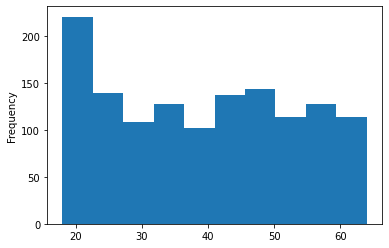

In [ ]:
df.age.plot(kind="hist")


Text(0, 0.5, 'count')

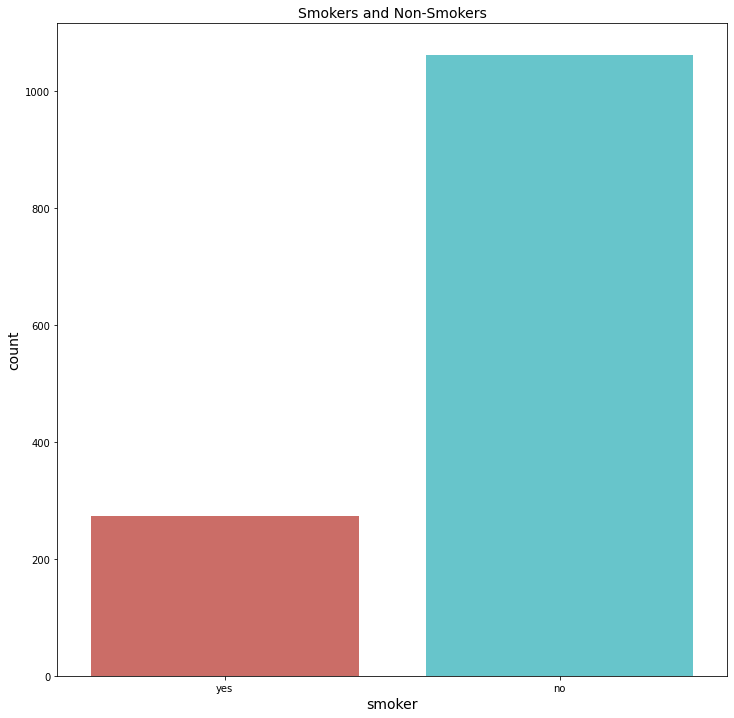

In [ ]:
import seaborn as sns
plt.figure(figsize = (12,12))
g = sns.countplot(x="smoker",data=df,palette='hls')
g.set_title("Smokers and Non-Smokers", fontsize=14)
g.set_xlabel("smoker", fontsize=14)
g.set_ylabel("count", fontsize=14)

Text(0, 0.5, 'count')

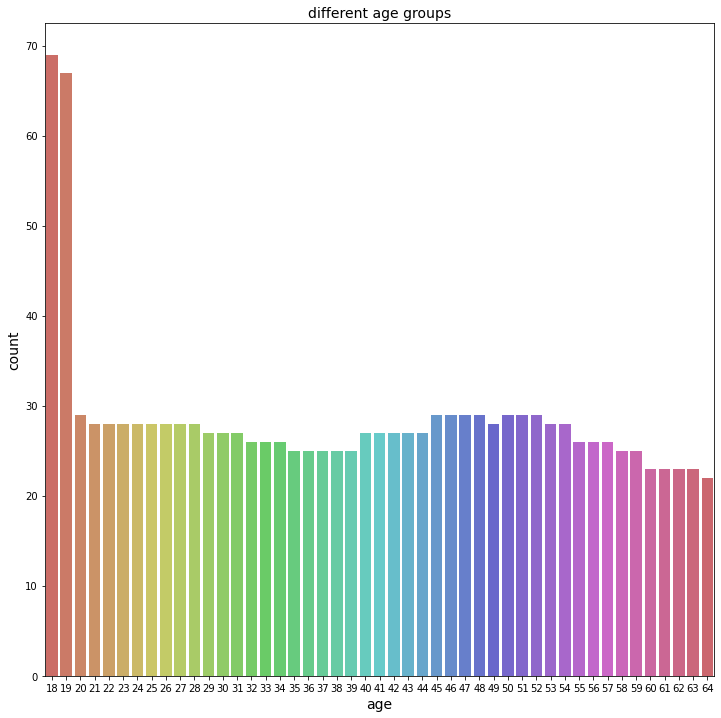

In [ ]:
plt.figure(figsize = (12,12))
g = sns.countplot(x="age",data=df,palette='hls')
g.set_title("different age groups", fontsize=14)
g.set_xlabel("age", fontsize=14)
g.set_ylabel("count", fontsize=14)

In [ ]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
numcol     = ['age', 'bmi', 'children', 'charges']
catcol = ['smoker', 'region' , 'sex']

In [ ]:
one_hot=pd.get_dummies(df[catcol])
data=pd.concat([df[numcol],one_hot],axis=1)
data.head(10)

,age,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.900,0,16884.92400,0,1,0,0,0,1,1,0
1,18,33.770,1,1725.55230,1,0,0,0,1,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0,0,0,1
4,32,28.880,0,3866.85520,1,0,0,1,0,0,0,1
5,31,25.740,0,3756.62160,1,0,0,0,1,0,1,0
6,46,33.440,1,8240.58960,1,0,0,0,1,0,1,0
7,37,27.740,3,7281.50560,1,0,0,1,0,0,1,0
8,37,29.830,2,6406.41070,1,0,1,0,0,0,0,1
9,60,25.840,0,28923.13692,1,0,0,1,0,0,1,0


In [ ]:
# data=df
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# for i in catcol:
#     data[i] = label_encoder.fit_transform(data[i])
# data.head(10)

In [ ]:
X=data.drop(columns='charges')
y=df[['charges']]

In [ ]:
X

,age,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.900,0,0,1,0,0,0,1,1,0
1,18,33.770,1,1,0,0,0,1,0,0,1
2,28,33.000,3,1,0,0,0,1,0,0,1
3,33,22.705,0,1,0,0,1,0,0,0,1
4,32,28.880,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,0,1,0,0,0,1
1334,18,31.920,0,1,0,1,0,0,0,1,0
1335,18,36.850,0,1,0,0,0,1,0,1,0
1336,21,25.800,0,1,0,0,0,0,1,1,0


In [ ]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [ ]:
train_predict = model.predict(train_X)


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
test_predict = model.predict(test_X)
print("Train : ",mean_absolute_error(train_y,train_predict))
print("Test  : ",mean_absolute_error(test_y,test_predict))

Train :  4181.90153777514
Test  :  4177.045561036318


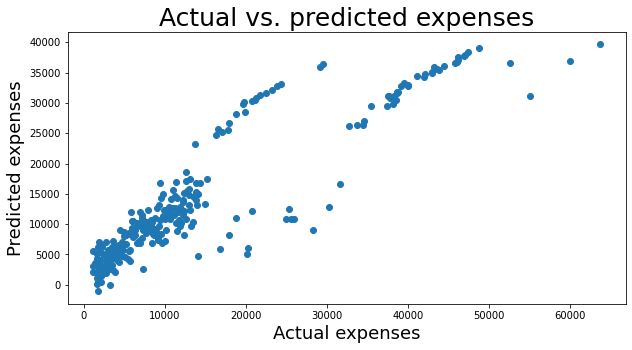

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Actual vs. predicted expenses",fontsize=25)
plt.xlabel("Actual expenses",fontsize=18)
plt.ylabel("Predicted expenses", fontsize=18)
plt.scatter(x=test_y,y=test_predict)